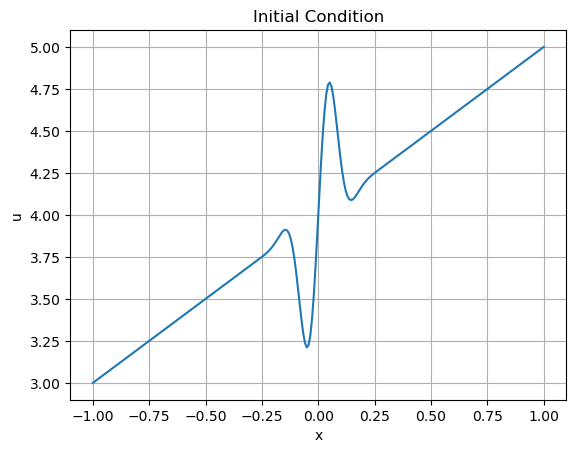

In [31]:
##Testing FFT  method to solve 1d diffusion equation (just a simple pde that I know has periodic eigenvalues)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 2  # Length of the domain
N = 256  # Number of grid points (including boundary points)
alpha = 0.1  # Diffusion coefficient
dx = L / (N - 1)  # Spatial step
dt = 0.0001  # Time step
T = 0.1  # Total time
x = np.linspace(-1, 1, N)  # Spatial grid

# Initial condition (Gaussian profile)
u_initial = np.exp(-100 * (x )**2)*np.sin(25*x)+x+4

# Boundary conditions
u_initial[0] = 3
u_initial[-1] = 5

# Plot initial condition
plt.plot(x, u_initial)
plt.title('Initial Condition')
plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.show()

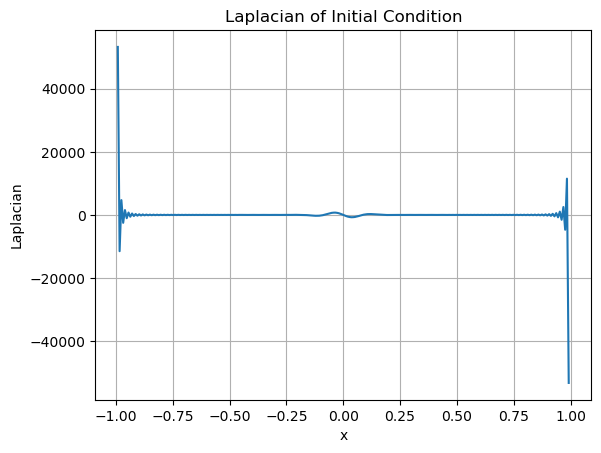

In [32]:
from scipy.fftpack import fft, ifft

# Function to compute the Fourier transform of the Laplacian
def laplacian_fourier(u):
    # Exclude boundary points
    u_inner = u[1:-1]
    # Compute Fourier transform
    u_fft = fft(u_inner)
    # Define wave numbers
    k = np.fft.fftfreq(N - 2, d=dx) * 2 * np.pi
    # Compute the Fourier transform of the Laplacian
    laplacian_fft = -k**2 * u_fft
    # Inverse Fourier transform to get the Laplacian in the spatial domain
    laplacian_spatial = ifft(laplacian_fft).real
    # Apply boundary conditions
    laplacian_full = np.concatenate(([0], laplacian_spatial, [0]))
    return laplacian_full

# Test the laplacian_fourier function with the initial condition
laplacian_u_initial = laplacian_fourier(u_initial)

# Plotting the Laplacian in spatial domain
plt.plot(x[1:-1], laplacian_u_initial[1:-1])
plt.title('Laplacian of Initial Condition')
plt.xlabel('x')
plt.ylabel('Laplacian')
plt.grid(True)
plt.show()

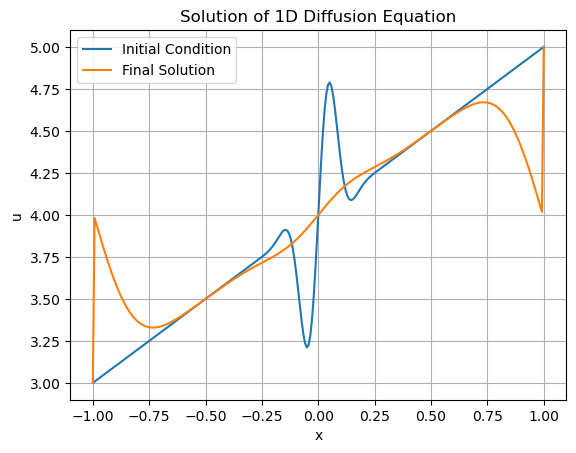

In [33]:
# Function to integrate the PDE using Crank-Nicolson method
def integrate_pde(u_initial, alpha, dx, dt, T):
    u = u_initial.copy()
    N_time_steps = int(T / dt)
    for n in range(N_time_steps):
        # Compute the Fourier transform of the Laplacian
        laplacian_u = laplacian_fourier(u)
        # Crank-Nicolson scheme for time integration
        u[1:-1] = u[1:-1] + dt * (alpha * laplacian_u[1:-1])
        # Apply boundary conditions
        u[0] = 3
        u[-1] = 5
    return u

# Integrate the PDE
u_final = integrate_pde(u_initial, alpha, dx, dt, T)

# Plot the final solution
plt.plot(x, u_initial, label="Initial Condition")
plt.plot(x, u_final, label="Final Solution")
plt.title('Solution of 1D Diffusion Equation')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.show()

